### Loading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
file_path = "/Users/annmarysebastian/Desktop/Dataset/"

In [4]:
df_aisles = pd.read_csv(file_path + 'aisles.csv')
df_departments = pd.read_csv(file_path + 'departments.csv')
df_order_products_prior = pd.read_csv(file_path + 'order_products__prior.csv')
df_order_products_train = pd.read_csv(file_path + 'order_products__train.csv')
df_orders = pd.read_csv(file_path + 'orders.csv')
df_products = pd.read_csv(file_path + 'products.csv')

### Looking into all Datasets

In [5]:
print(df_aisles.shape)
df_aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
print(df_departments.shape)
df_departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
print(df_order_products_prior.shape)
df_order_products_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
print(df_order_products_train.shape)
df_order_products_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
print(df_orders.shape)
df_orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [10]:
print(df_orders.shape)
df_orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [11]:
print(df_products.shape)
df_products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### Merging df_order_products_prior and df_order_products_train

In [12]:
df_order_products = pd.concat([df_order_products_prior, df_order_products_train])

In [13]:
print(df_order_products.shape)
df_order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### Data Visulization

#### Orders in each eval set

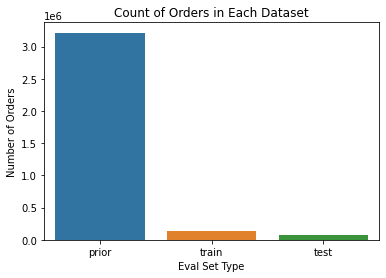

In [14]:
cnt_eval_set_orders = df_orders.eval_set.value_counts()

sns.barplot(cnt_eval_set_orders.index, cnt_eval_set_orders.values)

plt.ylabel('Number of Orders')
plt.xlabel('Eval Set Type')
plt.title('Count of Orders in Each Dataset')
plt.show()

###  Timing when orders are made

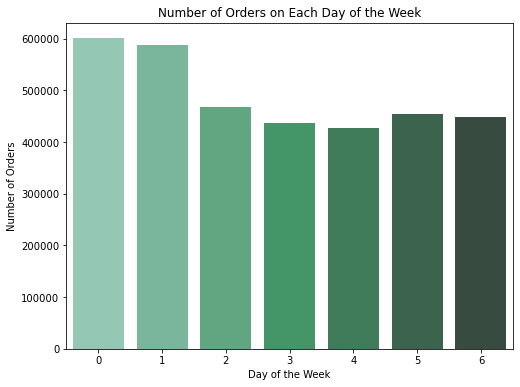

In [28]:
plt.figure(figsize=(8,6))

sns.countplot(x="order_dow", data=df_orders, palette=sns.color_palette("BuGn_d",7))

plt.ylabel('Number of Orders')
plt.xlabel('Day of the Week')
plt.title('Number of Orders on Each Day of the Week')
plt.show()

It looks as though 0 represents Saturday and 1 represents Sunday. Wednesday is then the least popular day to make orders.

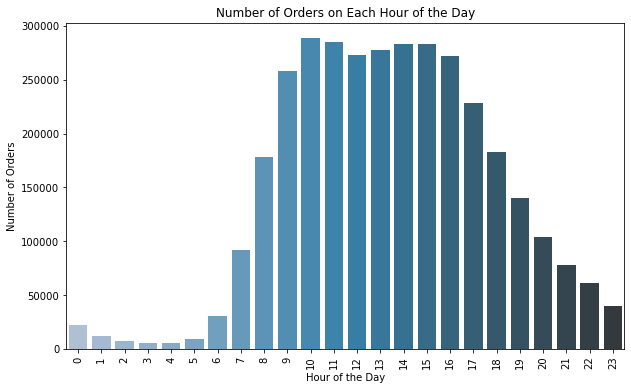

In [15]:
plt.figure(figsize=(10,6))

sns.countplot(x="order_hour_of_day", data=df_orders, palette=sns.color_palette("PuBu_d", 24))

plt.ylabel('Number of Orders')
plt.xlabel('Hour of the Day')
plt.xticks(rotation='vertical')
plt.title('Number of Orders on Each Hour of the Day')
plt.show()

The 10am hour is the most popular time to make orders, followed by a dip around lunch time and a pickup in the afternoon.

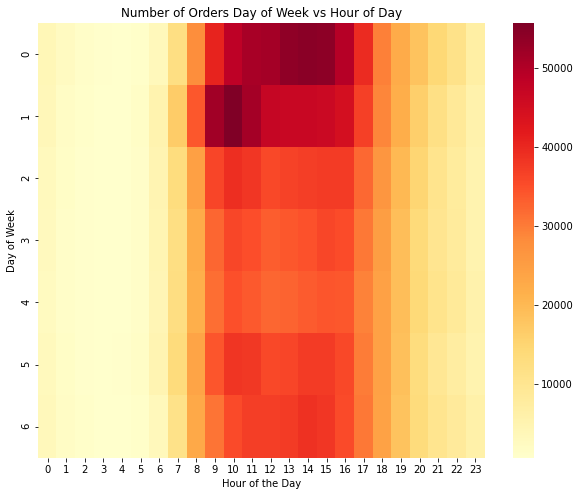

In [16]:
group_hour_dow = df_orders.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
group_hour_dow = group_hour_dow.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(10,8))

sns.heatmap(group_hour_dow, cmap='YlOrRd')

plt.ylabel('Day of Week')
plt.xlabel('Hour of the Day')
plt.title('Number of Orders Day of Week vs Hour of Day')
plt.show()

Saturday afternoon and Sunday morning are the most popular time to make orders.

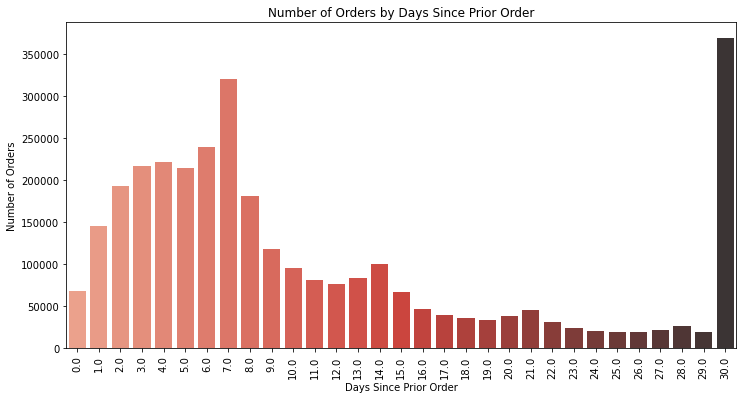

In [17]:
plt.figure(figsize=(12,6))

sns.countplot(x='days_since_prior_order', data=df_orders, palette='Reds_d')

plt.ylabel('Number of Orders')
plt.xlabel('Days Since Prior Order')
plt.xticks(rotation='vertical')
plt.title('Number of Orders by Days Since Prior Order')
plt.show()

While the most popular relative time between orders is monthly (30 days), there are "local maxima" at weekly (7 days), biweekly (14 days), triweekly (21 days), and quadriweekly (28 days).

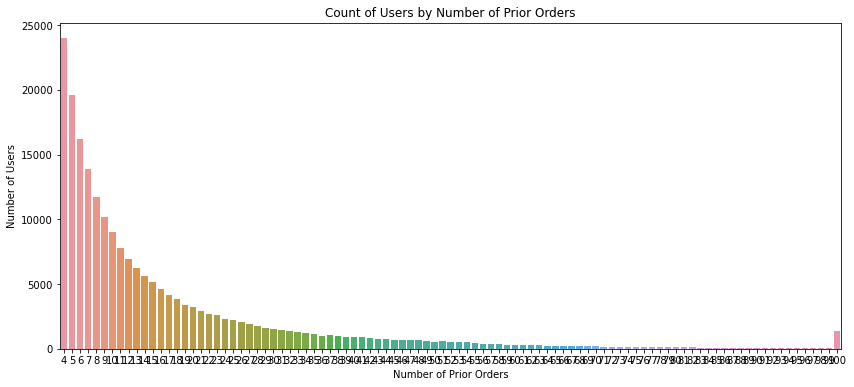

In [18]:
group_user_orders = df_orders.groupby('user_id')['order_number'].aggregate('max').reset_index()

# sns hist may be better; but possible to make bin size 1?

plt.figure(figsize=(14,6))

sns.barplot(x=group_user_orders['order_number'].value_counts().index, y=group_user_orders['order_number'].value_counts().values)

plt.title('Count of Users by Number of Prior Orders')
plt.xlabel('Number of Prior Orders')
plt.ylabel('Number of Users')
# Did not find a great way in seaborn to make tick labels for every other step; maybe try using xmin(), xmax() or just pandas:
plt.show()

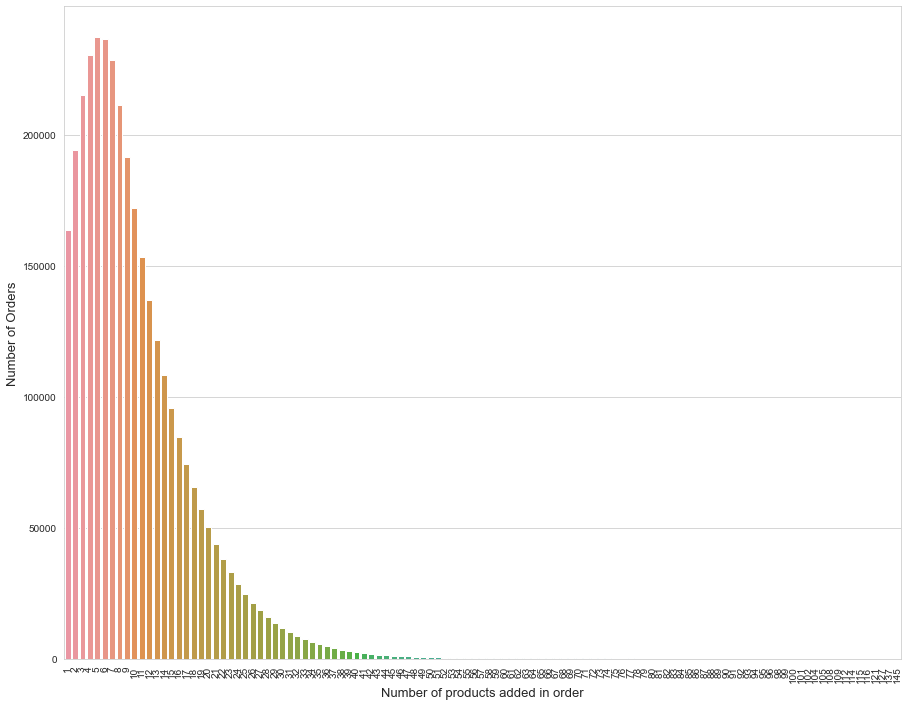

In [39]:
grouped = df_order_products.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)

plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
plt.show()

### Popular Products, Departments, and Aisles

### Popular Products

In [19]:
df = pd.merge(df_orders, df_order_products, on='order_id')
d = pd.merge(df, df_products, on='product_id')
d = pd.merge(d, df_aisles, on='aisle_id')
d = pd.merge(d, df_departments, on='department_id')

In [20]:
cnt_products = pd.crosstab(d.product_name, d.eval_set)
cnt_products['total'] = cnt_products.prior + cnt_products.train
cnt_products.sort_values(by='total', ascending=False).head(25)

eval_set,prior,train,total
product_name,,,
Banana,472565,18726,491291
Bag of Organic Bananas,379450,15480,394930
Organic Strawberries,264683,10894,275577
Organic Baby Spinach,241921,9784,251705
Organic Hass Avocado,213584,7293,220877
Organic Avocado,176815,7409,184224
Large Lemon,152657,8135,160792
Strawberries,142951,6494,149445
Limes,140627,6033,146660


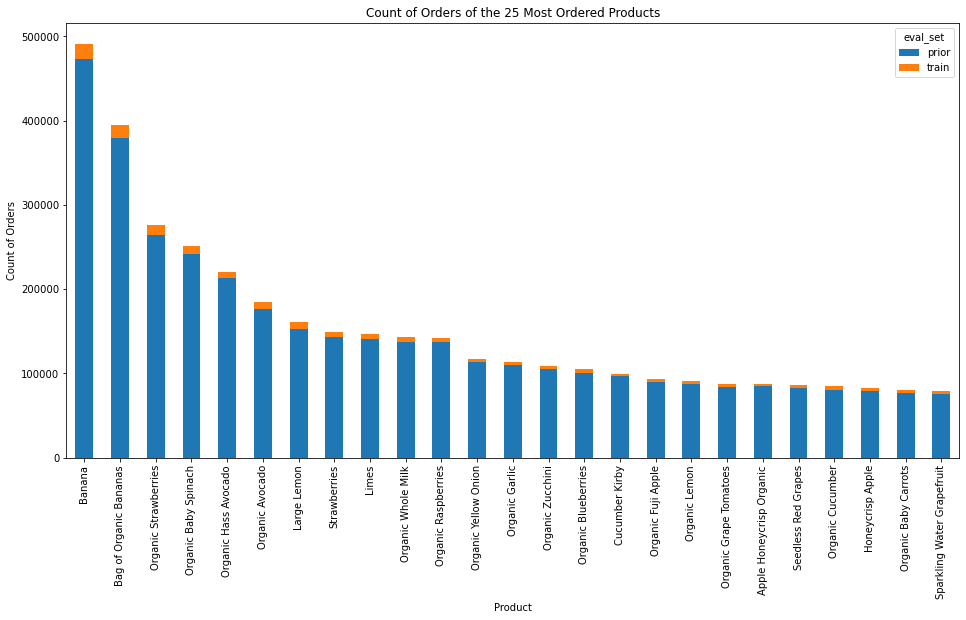

In [21]:
cnt_products.sort_values(by='total', ascending=False).head(25)[['prior', 'train']].plot(kind='bar', stacked=True, figsize=(16,8))
plt.title('Count of Orders of the 25 Most Ordered Products')
plt.xlabel('Product')
plt.ylabel('Count of Orders')
plt.show()

### Popular Aisle

In [22]:
cnt_aisles = pd.crosstab(d.aisle, d.eval_set)
cnt_aisles['total'] = cnt_aisles.prior + cnt_aisles.train
cnt_aisles.sort_values(by='total', ascending=False).head(15)

eval_set,prior,train,total
aisle,,,
fresh fruits,3642188,150473,3792661
fresh vegetables,3418021,150609,3568630
packaged vegetables fruits,1765313,78493,1843806
yogurt,1452343,55240,1507583
packaged cheese,979763,41699,1021462
milk,891015,32644,923659
water seltzer sparkling water,841533,36617,878150
chips pretzels,722470,31269,753739
soy lactosefree,638253,26240,664493


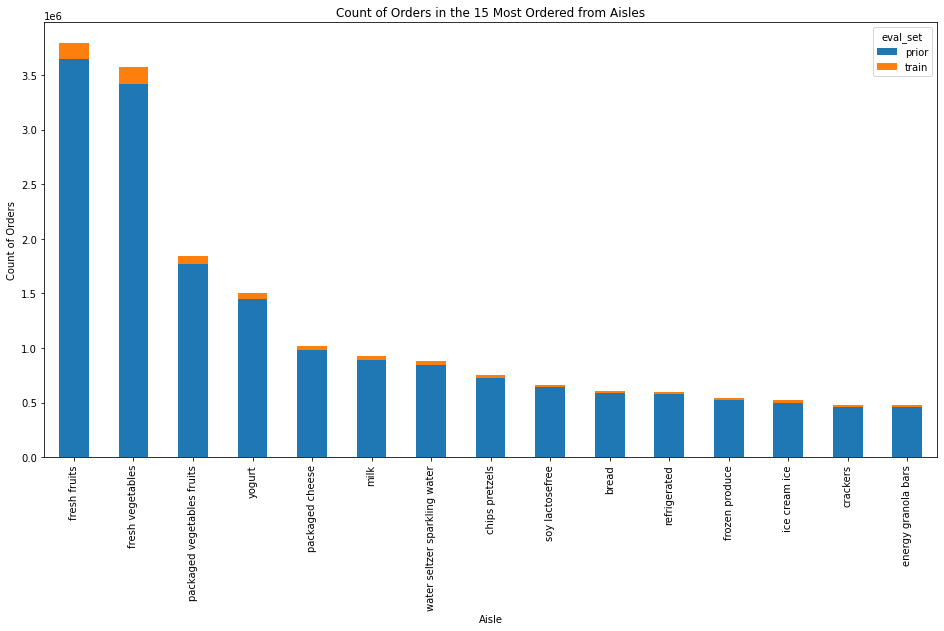

In [23]:
cnt_aisles.sort_values(by='total', ascending=False).head(15)[['prior', 'train']].plot(kind='bar', stacked=True, figsize=(16,8))
plt.title('Count of Orders in the 15 Most Ordered from Aisles')
plt.xlabel('Aisle')
plt.ylabel('Count of Orders')
plt.show()

### Popular Department

In [24]:
cnt_departments = pd.crosstab(d.department, d.eval_set)
cnt_departments['total'] = cnt_departments.prior + cnt_departments.train
cnt_departments['total_pct'] = cnt_departments.total / cnt_departments.total.sum()
cnt_departments.sort_values(by='total', ascending=False)

eval_set,prior,train,total,total_pct
department,,,,
produce,9479291,409087,9888378,0.292390
dairy eggs,5414016,217051,5631067,0.166505
snacks,2887550,118862,3006412,0.088897
beverages,2690129,114046,2804175,0.082917
frozen,2236432,100426,2336858,0.069099
pantry,1875577,81242,1956819,0.057861
bakery,1176787,48394,1225181,0.036227
canned goods,1068058,46799,1114857,0.032965
deli,1051249,44291,1095540,0.032394


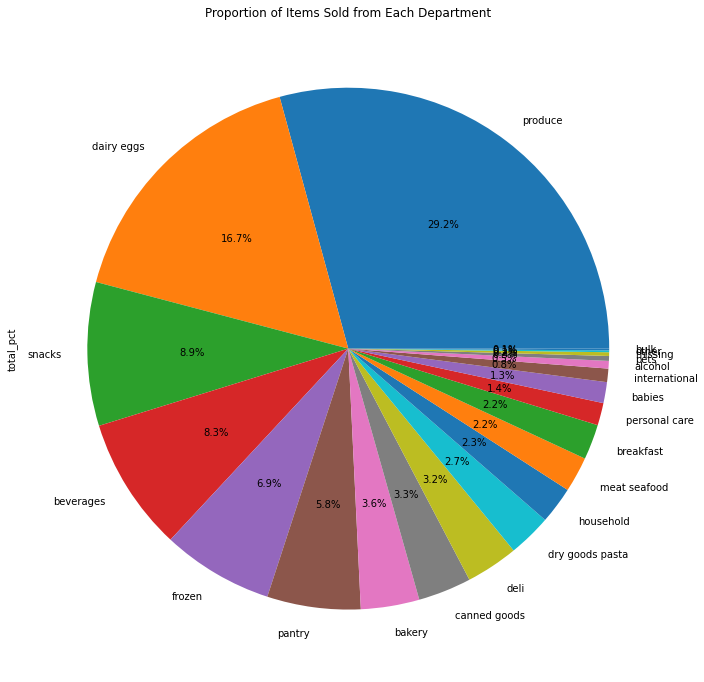

In [26]:
cnt_departments.sort_values(by='total', ascending=False).total_pct.plot(kind='pie', autopct='%1.1f%%', figsize=(12,12))
plt.title('Proportion of Items Sold from Each Department')
plt.show()